# SPICED Academy ///  Project Week 02 /// Classification

***

## I. Define goal

Create a machine learning model using logistic regression that predicts if a person survived the Titanic accident (and just playing around with machine learning in general).

***

## II. Import libraries and get data

In [107]:
#data processing
import pandas as pd

#data visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

#feature engineering
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

#machine learning models
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

#accuracy check 
from sklearn import metrics
from sklearn.model_selection import cross_validate

In [2]:
#open relevant files
titanic = pd.read_csv('train.csv', index_col = 0, sep = ',')

***

## III. Splitting the data in train and test data

In [3]:
#splitting the data
X = titanic
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(titanic, y, test_size=0.20, random_state = 101)

In [4]:
#checking if the splitting worked
X_train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.00,NaN,S
858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.55,E17,S
82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.50,NaN,S
320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.50,E34,C
721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.00,NaN,S


In [5]:
#checking if the splitting worked
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 332 to 467
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  179 non-null    int64  
 1   Pclass    179 non-null    int64  
 2   Name      179 non-null    object 
 3   Sex       179 non-null    object 
 4   Age       137 non-null    float64
 5   SibSp     179 non-null    int64  
 6   Parch     179 non-null    int64  
 7   Ticket    179 non-null    object 
 8   Fare      179 non-null    float64
 9   Cabin     47 non-null     object 
 10  Embarked  179 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 16.8+ KB


***

## IV. Exploring the train data set

In [6]:
#VARIABLES:

#categorical: 
#Pclass: Passenger’s class
#Sex: Passenger’s sex
#SibSp: Number of siblings/spouses aboard
#Parch: Number of parents/children aboard

#nominal:
#Age: Passenger’s age
#Fare: Fare

#excluded in the beginning: 
#Cabin: Cabin
#Ticket: Ticket number
#Name: Passenger’s name
#Embarked: Port of embarkation

########################################################

#Y
#Survived: Survived (1) or died (0)

<Figure size 432x288 with 0 Axes>

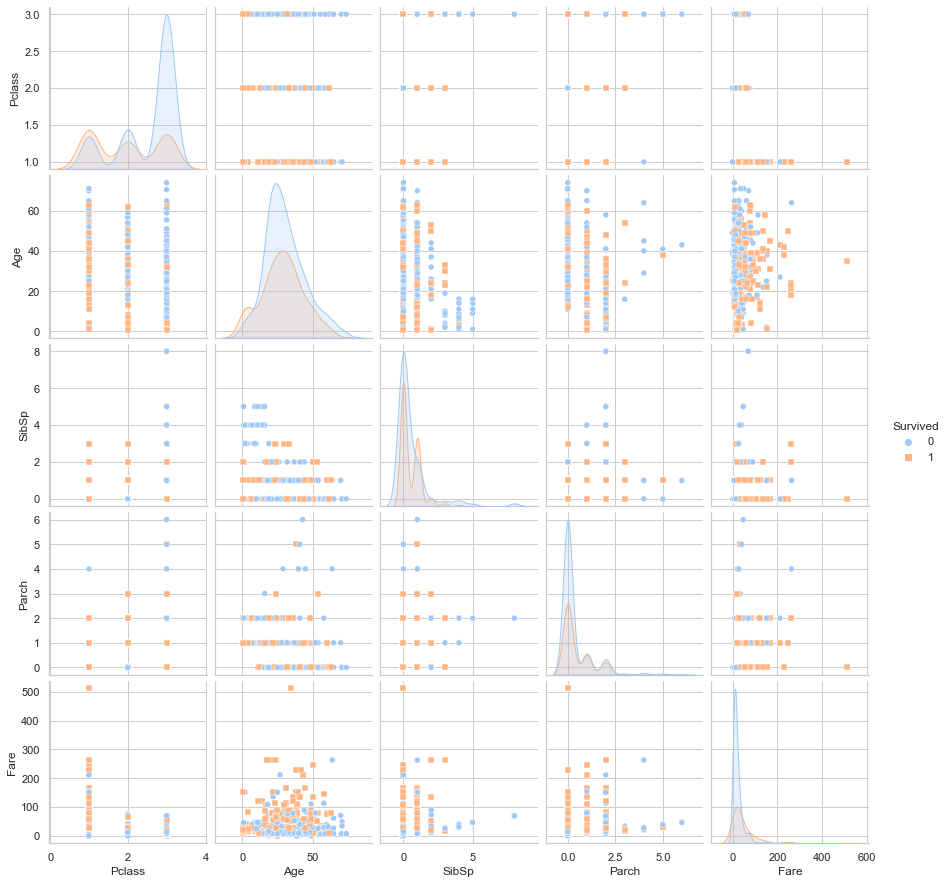

In [7]:
#examining the columns and the columns` values
sns.set_theme(style="whitegrid", palette="pastel")
sns.despine(left=True)
sns.pairplot(X_train, hue= "Survived", markers=["o", "s"])

>>> firstly, "cabin" & "name" are excluded as they are (more or less) related to fare price, and "ticket" and "embarked" are firstly excluded as theses features do not seem to really matter<br><br><font color='blue'>also "name", "ticket", "embarked" and "cabin" might be features that can lead to overfitting</font>

***

### *CATEGORICAL: PASSENGER CLASS*

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

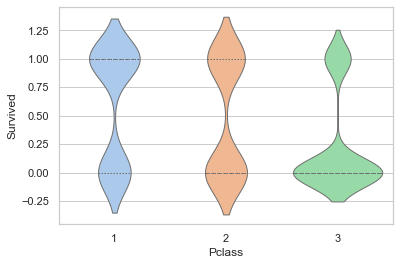

In [9]:
# Draw a nested violinplot for Pclass and split the violins for easier comparison
sns.set_theme(style="whitegrid", palette="pastel")
sns.despine(left=True)

sns.violinplot(data=X_train, x="Pclass", y="Survived",
               split=True, inner="quart", linewidth=1)

>>>more people survived in the first class and more people died in the third class, also fits to pairplot and correlation matrix above<br><br><font color='blue'>"passenger class" should be included in the machine learning model</font>

***

### *CATEGORICAL: SEX*

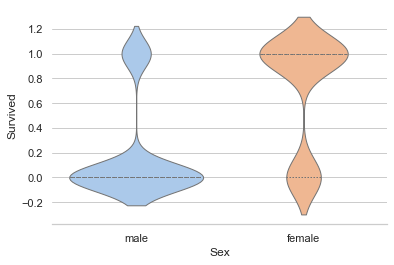

In [10]:
# Draw a nested violinplot for Sex and split the violins for easier comparison
sns.violinplot(data=X_train, x="Sex", y="Survived",
               split=True, inner="quart", linewidth=1)
sns.set_theme(style="whitegrid", palette="pastel")
sns.despine(left=True)

>>>more male died than females, meaning that gender also played a role in survival chances <br><br><font color='blue'>"sex" should be included in the machine learning model*</font>

***

### *CATEGORICAL: SIBLINGS/SPOUSES*

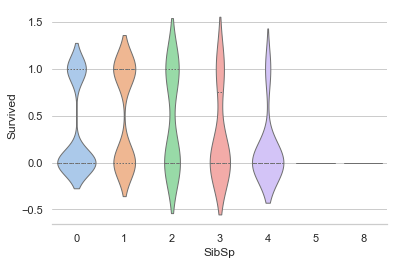

In [11]:
# Draw a nested violinplot for Sex and split the violins for easier comparison
sns.violinplot(data=X_train, x="SibSp", y="Survived",
               split=True, inner="quart", linewidth=1)
sns.set_theme(style="whitegrid", palette="pastel")
sns.despine(left=True)

>>> if a traveller has 0 siblings/spouses, chances of dying are higher<br>if a traveller has 1 or 2 siblings/spouses, chances of dying are equal to surviving<br>if a traveller has 3 or 4 siblings/spouses, chances of dying are higher<br><br><font color='blue'>"spouses/siblings" should be included in the machine learning model</font>

***

### *CATEGORICAL: PARENTS/CHILDREN*

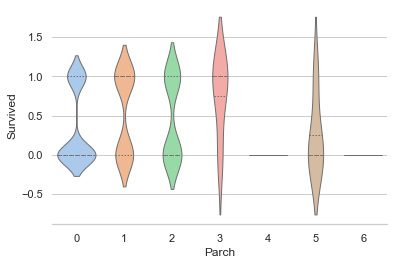

In [12]:
# Draw a nested violinplot for Parents/Children and split the violins for easier comparison
sns.violinplot(data=X_train, x="Parch", y="Survived",
               split=True, inner="quart", linewidth=1)
sns.set_theme(style="whitegrid", palette="pastel")
sns.despine(left=True)



>>> if a traveller has 0 parents/children, chances of dying are higher<br><br>if a traveller has 1 or 2 parents/children, chances of dying are equal to surviving<br>if a traveller has 3 parents/children, chances of surviving are higher<br>if a traveller has 5 parents/children, chances of dying are higher<br><br><font color='blue'>"parents/children" should be included in the machine learning model</font>

***

***

### *NOMINAL: AGE*

<AxesSubplot:xlabel='Age', ylabel='Count'>

<Figure size 432x288 with 0 Axes>

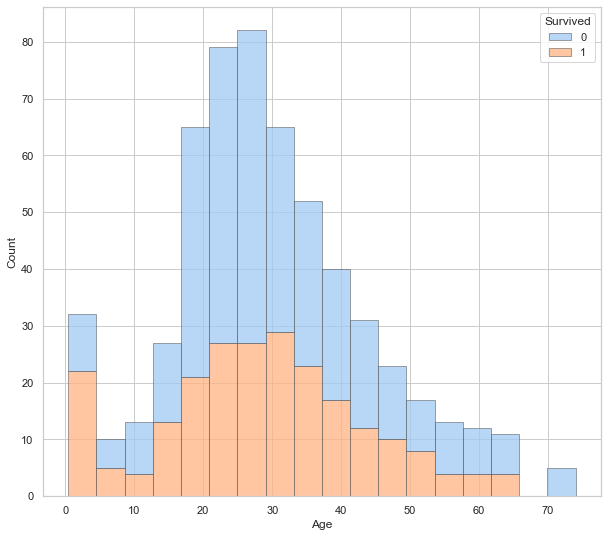

In [13]:
#Creating a stacked histogram for "Age", hue being "Survived"

sns.set_theme(style="whitegrid", palette="pastel")
sns.despine(left=True)
f, ax = plt.subplots(figsize=(10, 9))

sns.histplot(
    X_train,
    x="Age", hue="Survived",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5
)


>>> unsurprisingly, it seemed to mattter if a passenger died or survived depending on given age<br><br>if a traveller was below the age of 5, chances of survival were relatively good<br>if a traveller was between 15 and 45, chances of dying were significantly higher than chances of survival<br><br><font color='blue'>"age" should be included in the machine learning model</font>

***

### *NOMINAL: FARE*

<AxesSubplot:xlabel='Fare', ylabel='Count'>

<Figure size 432x288 with 0 Axes>

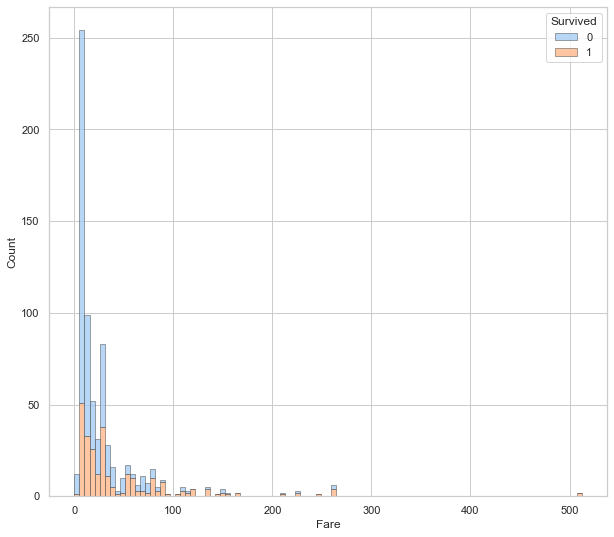

In [14]:
#Creating a stacked histogram for "Age", hue being "Survived"

sns.set_theme(style="whitegrid", palette="pastel")
sns.despine(left=True)
f, ax = plt.subplots(figsize=(10,9))

sns.histplot(
    X_train,
    x="Fare", hue="Survived",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5
)


>>> unsurprisingly, it seemed to mattter if a passenger died or survived depending on paid fare price<br><br> if a traveller paid below circa 30 pounds, chances of dying were way higher than of survival > paid fare price might also be correspondent to sleeping deck (A,B,C,D) and access to lifeboats, etc.<br><br><font color='blue'> "fare" should be included in the machine learning model</font>

## <font color='blue'>SUMMARY /// EXPLORATORY DATA ANALYSIS 
Only the very generalizable features are included in this notebook (keyword: overfitting), being applied in three different machine learning models. M1 only contains demographic features, M2 contains demographic as well as socioeconomic features, M3 contains demographic, socioeconomic as well as social features.<br><br><font color='blue'>Features included in this notebook:</font><br> 1. Demographic features: "Age" and "Sex"<br>2. Socioeconomic features: "Fare" and "Passenger`s class"<br>3. Social features: "Number of siblings/spouses aboard" and "Number of parents/children aboard"<br><br><font color='blue'>Features excluded in this notebook:</font><br>4. Titanic specific features: "Port of embarkation", and maybe later on also "Name", "Ticket", and "Cabin"</font>

***

## V. Feature Engineering

### *V.I. Removing the y from train and test data*

In [15]:
#removing the column "Survived" from the train and test dataset 
X_train = X_train.drop('Survived', axis = 1)
X_test = X_test.drop('Survived', axis = 1)

In [16]:
#checking if y true was deleted from the train and test dataset 
X_train.head()
X_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
332,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.500,C124,S
701,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.525,C62 C64,C
749,1,"Marvin, Mr. Daniel Warner",male,19.0,1,0,113773,53.100,D30,S
752,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.475,E121,S
482,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.000,NaN,S


***

### *V.II. Removing the secondary features from the datasets: "Port of embarkation", "Name", "Ticket", and "Cabin"*

In [17]:
#removing the column "Port of embarkation", "Name", "Ticket", and "Cabin" from the train and test dataset 
X_train = X_train.drop(['Embarked','Name', 'Ticket','Cabin'], axis = 1)
X_test = X_test.drop(['Embarked','Name', 'Ticket','Cabin'], axis = 1)

In [18]:
#reordering the columns "demographic features", "socioeconomic features" and "social features" (just for fun)
column_names = ["Sex", "Age", "Pclass", "Fare", "SibSp", "Parch"]
X_train = X_train.reindex(columns=column_names)
X_test = X_test.reindex(columns=column_names)
X_train.info

<bound method DataFrame.info of                 Sex   Age  Pclass      Fare  SibSp  Parch
PassengerId                                              
734            male  23.0       2   13.0000      0      0
858            male  51.0       1   26.5500      0      0
82             male  29.0       3    9.5000      0      0
320          female  40.0       1  134.5000      1      1
721          female   6.0       2   33.0000      0      1
...             ...   ...     ...       ...    ...    ...
576            male  19.0       3   14.5000      0      0
839            male  32.0       3   56.4958      0      0
338          female  41.0       1  134.5000      0      0
524          female  44.0       1   57.9792      0      1
864          female   NaN       3   69.5500      8      2

[712 rows x 6 columns]>

***

### *V.III. Discover and replace missing values for the train and test datasets*

In [19]:
#Checking how many missed columns there are /// Age
X_train.isna().sum()

Sex         0
Age       135
Pclass      0
Fare        0
SibSp       0
Parch       0
dtype: int64

In [20]:
#Applying the KNNImputer on Age, 
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean', copy=False, add_indicator=False)
cols_train = X_train[['Age']]
cols_test = X_test[['Age']]

In [21]:
#Fitting the KNN Imputer method on the train data set
imputer.fit(cols_train) # DO NOT FIT ON TEST DATA

KNNImputer(copy=False)

In [22]:
#Transforming the age column for both datasets
t_train = imputer.transform(cols_train)
t_test = imputer.transform(cols_test)

In [23]:
#Creating a new dataframe for each age column, train and test
age_imputed_train = pd.DataFrame(t_train, columns=cols_train.columns)
age_imputed_test = pd.DataFrame(t_test, columns=cols_test.columns)

In [24]:
#Exchanging the "Age" values
X_train['Age'] = age_imputed_train.values
X_test['Age'] = age_imputed_test.values

In [77]:
#Final check
X_train

,Sex,Age,Pclass,Fare,SibSp,Parch
PassengerId,,,,,,
734,male,23.000000,2,13.0000,0,0
858,male,51.000000,1,26.5500,0,0
82,male,29.000000,3,9.5000,0,0
320,female,40.000000,1,134.5000,1,1
721,female,6.000000,2,33.0000,0,1
...,...,...,...,...,...,...
576,male,19.000000,3,14.5000,0,0
839,male,32.000000,3,56.4958,0,0
338,female,41.000000,1,134.5000,0,0


***

***

## VI. Train model(s)

### <font color='blue'>MODEL I: Demographic features<font>

*Feature Engineering: Transforming the numerical and categorical columns*

In [26]:
#Slicing out the demographic features only
X_train_m1 = X_train[['Sex','Age']]
X_test_m1 = X_test[['Sex','Age']]

In [27]:
#Seperating the numerical and categorical columns 
categorical_columns = ['Sex']
numerical_columns = ['Age']

In [28]:
#Defining the transformer and its parameters
column_transformer = ColumnTransformer([
    ('cat_encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_columns),
    ('num_scaler', MinMaxScaler(), numerical_columns)
])

In [29]:
#Fitting the columns to the transforming method
column_transformer.fit(X_train_m1) # DO NOT FIT ON TEST DATA

ColumnTransformer(transformers=[('cat_encoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['Sex']),
                                ('num_scaler', MinMaxScaler(), ['Age'])])

In [30]:
#Transforming the columns
X_train_m1 = column_transformer.transform(X_train_m1)
X_test_m1 = column_transformer.transform(X_test_m1) 

***

*Applying a logistic regression model*

In [31]:
#applying a logistic regression model 
m = LogisticRegression()

In [32]:
#train the model 
m.fit(X_train_m1, y_train)

LogisticRegression()

In [33]:
#Calculating the score for the train data set
m.score(X_train_m1, y_train)

0.7851123595505618

In [34]:
#Calculating the score for the test data set
m.score(X_test_m1, y_test)

0.7932960893854749

In [35]:
#Predicting 
y_pred = m.predict(X_test_m1)

***

*Checking out the metrics*

In [36]:
#checking out the accuracy score
metrics.accuracy_score(y_test, y_pred)  

0.7932960893854749

In [37]:
#checking out the precision score
metrics.precision_score(y_test, y_pred) 

0.8307692307692308

In [38]:
#checking out the recall
metrics.recall_score(y_test, y_pred) 

0.675

In [39]:
#checking out f1
metrics.f1_score(y_test, y_pred) 

0.7448275862068966

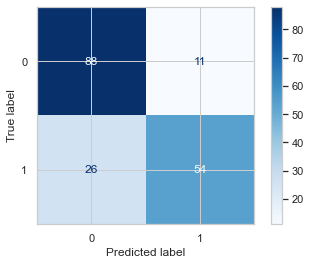

In [40]:
#Applying a confusion matrix 
metrics.confusion_matrix(y_test, y_pred)
metrics.plot_confusion_matrix(m, X_test_m1, y_test, cmap='Blues')

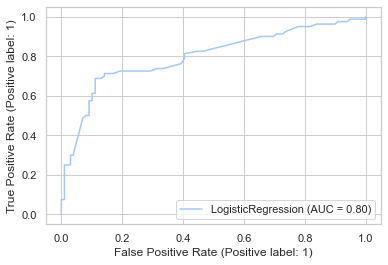

In [41]:
#Checking out the ROC / AUC 
metrics.plot_roc_curve(m, X_test_m1, y_test)

***

### <font color='blue'>MODEL II: Demograpic features + socioeconomic features<font>

*Feature Engineering: Transforming the numerical and categorical columns*

In [42]:
#Slicing out the demographic features only
X_train_m2 = X_train[['Sex','Age','Pclass','Fare']]
X_test_m2 = X_test[['Sex','Age','Pclass','Fare']]

In [43]:
#Seperating the numerical and categorical columns 
categorical_columns = ['Sex', 'Pclass']
numerical_columns = ['Age', 'Fare']

In [44]:
#Defining the transformer and its parameters
column_transformer = ColumnTransformer([
    ('cat_encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_columns),
    ('num_scaler', MinMaxScaler(), numerical_columns)
])

In [45]:
#Fitting the columns to the transforming method
column_transformer.fit(X_train_m2) # DO NOT FIT ON TEST DATA

ColumnTransformer(transformers=[('cat_encoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['Sex', 'Pclass']),
                                ('num_scaler', MinMaxScaler(),
                                 ['Age', 'Fare'])])

In [46]:
#Transforming the columns
X_train_m2 = column_transformer.transform(X_train_m2)
X_test_m2 = column_transformer.transform(X_test_m2) 

***

*Applying a logistic regression model*

In [47]:
#applying a logistic regression model 
m = LogisticRegression()

In [48]:
#train the model 
m.fit(X_train_m2, y_train)

LogisticRegression()

In [49]:
#Calculating the score for the train data set
m.score(X_train_m2, y_train)

0.7963483146067416

In [50]:
#Calculating the score for the test data set
m.score(X_test_m2, y_test)

0.8100558659217877

In [51]:
#Predicting 
y_pred = m.predict(X_test_m2)

***

*Checking out the metrics*

In [52]:
#checking out the accuracy score
metrics.accuracy_score(y_test, y_pred)  

0.8100558659217877

In [53]:
#checking out the precision score
metrics.precision_score(y_test, y_pred) 

0.859375

In [54]:
#checking out the recall
metrics.recall_score(y_test, y_pred) 

0.6875

In [55]:
#checking out f1
metrics.f1_score(y_test, y_pred) 

0.7638888888888888

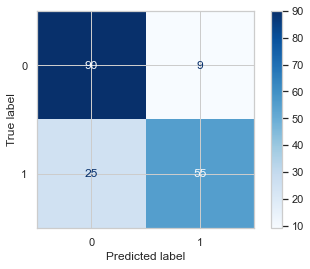

In [56]:
#Applying a confusion matrix 
metrics.confusion_matrix(y_test, y_pred)
metrics.plot_confusion_matrix(m, X_test_m2, y_test, cmap='Blues')

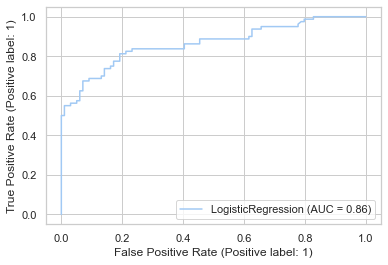

In [57]:
#Checking out the ROC / AUC 
metrics.plot_roc_curve(m, X_test_m2, y_test)

***

### <font color='blue'>MODEL III: Demograpic features + socioeconomic features + social features<font>

*Feature Engineering: Transforming the numerical and categorical columns*

In [58]:
#Slicing out the demographic features only
X_train_m3 = X_train[['Sex','Age','Pclass','Fare','SibSp','Parch']]
X_test_m3 = X_test[['Sex','Age','Pclass','Fare','SibSp','Parch']]

In [59]:
#Seperating the numerical and categorical columns 
categorical_columns = ['Sex', 'Pclass','SibSp', 'Parch']
numerical_columns = ['Age', 'Fare']

In [60]:
#Defining the transformer and its parameters
column_transformer = ColumnTransformer([
    ('cat_encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_columns),
    ('num_scaler', MinMaxScaler(), numerical_columns)
])

In [61]:
#Fitting the columns to the transforming method
column_transformer.fit(X_train_m3) # DO NOT FIT ON TEST DATA

ColumnTransformer(transformers=[('cat_encoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['Sex', 'Pclass', 'SibSp', 'Parch']),
                                ('num_scaler', MinMaxScaler(),
                                 ['Age', 'Fare'])])

In [62]:
#Transforming the columns
X_train_m3 = column_transformer.transform(X_train_m3)
X_test_m3 = column_transformer.transform(X_test_m3) 

***

*Applying a logistic regression model*

In [63]:
#applying a logistic regression model 
m = LogisticRegression()

In [64]:
#train the model 
m.fit(X_train_m3, y_train)

LogisticRegression()

In [65]:
#Calculating the score for the train data set
m.score(X_train_m3, y_train)

0.8132022471910112

In [66]:
#Calculating the score for the test data set
m.score(X_test_m3, y_test)

0.7932960893854749

In [67]:
#Predicting 
y_pred = m.predict(X_test_m3)

***

*Checking out the metrics*

In [68]:
#checking out the accuracy score
metrics.accuracy_score(y_test, y_pred)  

0.7932960893854749

In [69]:
#checking out the precision score
metrics.precision_score(y_test, y_pred) 

0.8307692307692308

In [70]:
#checking out the recall
metrics.recall_score(y_test, y_pred) 

0.675

In [71]:
#checking out f1
metrics.f1_score(y_test, y_pred) 

0.7448275862068966

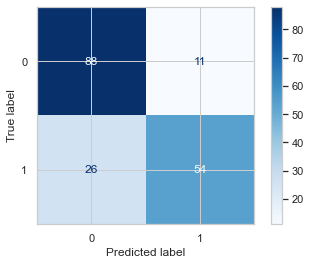

In [72]:
#Applying a confusion matrix 
metrics.confusion_matrix(y_test, y_pred)
metrics.plot_confusion_matrix(m, X_test_m3, y_test, cmap='Blues')

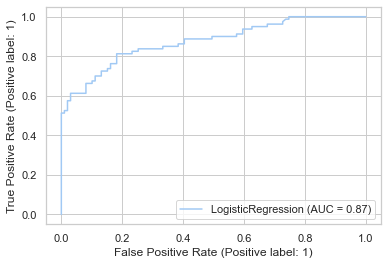

In [73]:
#Checking out the ROC / AUC 
metrics.plot_roc_curve(m, X_test_m3, y_test)

***

## <font color='blue'>SUMMARY /// LOGISTIC REGRESSION MACHINE LEARNING MODELS
The following features were included in the machine learning model, starting from the most generalizable features to the more Titanic specific ones (keyword: overfitting)<br><br> <font color='blue'>1th Model:</font> Demographic features: "Age" and "Sex" (m_test_score = 0,78 ; AUC = 0,80) <br><font color='blue'>2nd Model:</font> Adding socioeconomic features on top: "Fare" and "Passenger`s class" (m_test_score = 0,81 ; AUC = 0,86) <br><font color='blue'>3rd Model:</font> Adding social features on top: "Number of siblings/spouses aboard" and "Number of parents/children aboard" (m_test_score = 0,79 ; AUC = 0,87)<br><br><font color='blue'></font><br>The third model yielded the best results best on AUC and has almost the same m_test_score! </font>

***

## <font color='blue'>JUST FOR FUN /// CHECKING OUT DIFFERENT MACHINE LEARNING MODELS <font color>

*Feature Engineering: Transforming the numerical and categorical columns*

In [78]:
#Slicing out the demographic features only
X_train = X_train[['Sex','Age','Pclass','Fare','SibSp','Parch']]
X_test = X_test[['Sex','Age','Pclass','Fare','SibSp','Parch']]

In [79]:
#Seperating the numerical and categorical columns 
categorical_columns = ['Sex', 'Pclass','SibSp', 'Parch']
numerical_columns = ['Age', 'Fare']

In [80]:
#Defining the transformer and its parameters
column_transformer = ColumnTransformer([
    ('cat_encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_columns),
    ('num_scaler', MinMaxScaler(), numerical_columns)
])

In [81]:
#Fitting the columns to the transforming method
column_transformer.fit(X_train) # DO NOT FIT ON TEST DATA

ColumnTransformer(transformers=[('cat_encoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['Sex', 'Pclass', 'SibSp', 'Parch']),
                                ('num_scaler', MinMaxScaler(),
                                 ['Age', 'Fare'])])

In [83]:
#Transforming the columns
X_train = column_transformer.transform(X_train)
X_test = column_transformer.transform(X_test) 

***

*Stochastic Gradient Descent (SGD)*

In [155]:
#Applying the model
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)

sgd.score(X_train, y_train)
sgd.score(X_test, y_test)

Y_pred = sgd.predict(X_test)

In [156]:
#Checking out the sgd test score
sgd_score_test = sgd.score(X_test, y_test)
print(sgd_score_test)

0.7932960893854749


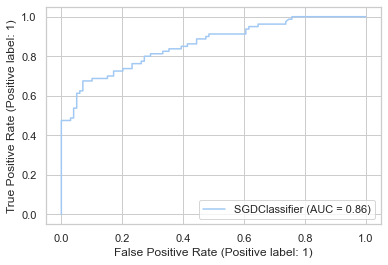

In [152]:
#Checking out the roc curve
metrics.plot_roc_curve(sgd, X_test, y_test)

***

*Random Forest*

In [158]:
#Applying the model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

random_forest.score(X_train, y_train)
random_forest.score(X_test, y_test)

y_pred = random_forest.predict(X_test)

In [159]:
#Checking out the random forest test score
random_forest_score_test = random_forest.score(X_test, y_test)
print(random_forest_score_test)

0.8044692737430168


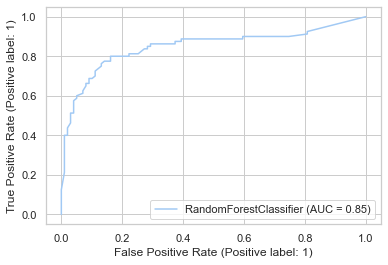

In [160]:
#Checking out the roc curve
metrics.plot_roc_curve(random_forest, X_test, y_test)

***

*Logistic Regression*

In [154]:
#Applying the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

m.score(X_train, y_train)
m.score(X_test, y_test)

y_pred = m.predict(X_test)

0.7932960893854749


In [189]:
#Checking out the logistic regression test score
logreg_score_test = logreg.score(X_test, y_test)
print(logreg_score_test)

0.7932960893854749


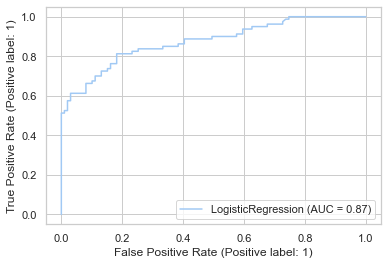

In [162]:
#Checking out the roc curve
metrics.plot_roc_curve(logreg, X_test, y_test)

***

*KNN nearest neigbors*

In [163]:
#Applying the model
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)

knn.score(X_train, y_train)
knn.score(X_test, y_test)

y_pred = knn.predict(X_test)  

In [169]:
#Checking out the KNN nearest neigbors test score
knn_score_test = knn.score(X_test, y_test)
print(knn_score_test)

0.8324022346368715


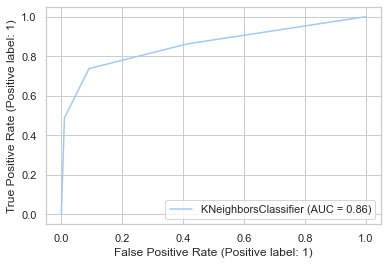

In [168]:
#Checking out the roc curve
metrics.plot_roc_curve(knn, X_test, y_test)

***

*Gaussian Naive Bayes*

In [210]:
#Gaussian Naive Bayes:
gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  

gaussian.score(X_train, y_train)
gaussian.score(X_test, y_test)

y_pred = gaussian.predict(X_test)  

###

y_pred = gaussian.score(X_test, y_test)

In [211]:
#Checking out the Linear Gaussian Naive Bayestest score
gaussian_score_test = gaussian.score(X_test, y_test)
print(gaussian_score_test)

0.4692737430167598


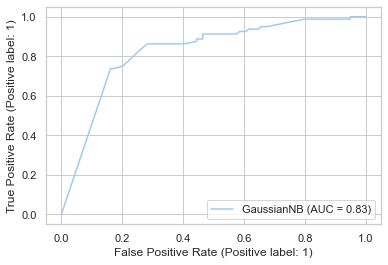

In [172]:
#Checking out the roc curve
metrics.plot_roc_curve(gaussian, X_test, y_test)

***

*Linear Support Vector Machine*

In [175]:
#Applying the model
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

linear_svc.score(X_train, y_train)
linear_svc.score(X_test, y_test)

y_pred = linear_svc.predict(X_test)  

In [176]:
#Checking out the Linear Support Vector Machine test score
linear_svc_score_test = linear_svc.score(X_test, y_test)
print(linear_svc_score_test)

0.7988826815642458


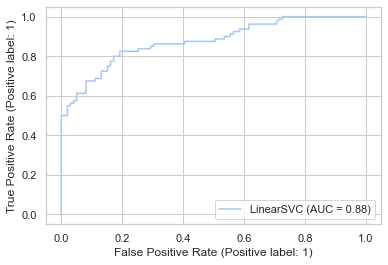

In [177]:
#Checking out the roc curve
metrics.plot_roc_curve(linear_svc, X_test, y_test)

***

*Decision Tree*

In [192]:
#Applying the model
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  

decision_tree.score(X_train, y_train)
decision_tree.score(X_test, y_test)

y_pred = decision_tree.predict(X_test)  

In [193]:
#Checking out the Decision Tree test score
decision_tree_score_test = decision_tree.score(X_test, y_test)
print(decision_tree_score_test)

0.7877094972067039


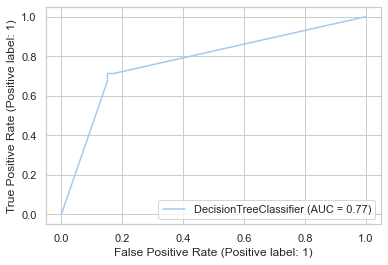

In [194]:
#Checking out the roc curve
metrics.plot_roc_curve(decision_tree, X_test, y_test)

***

*Finding the best model*

In [221]:
#Creating a ranking of the various machine learning models, sorted by AUC
results = pd.DataFrame({'Machine Learning Model': ['Stochastic Gradient Decent', 'Random Forest', 'Logistic Regression', 'KNN', 'Naive Bayes', 'Linear SVM', 'Decision Tree'],'AUC': [0.86, 0.85, 0.87, 0.86, 0.83, 0.88, 0.78],' Test Score': [sgd_score_test, random_forest_test_score, logreg_test_score, knn_score_test, gaussian_score_test, linear_svc_score_test, decision_tree_score_test]})
result_df = results.sort_values(by='AUC', ascending=False)
result_df = result_df.set_index('Machine Learning Model')
result_df.head(9)

,AUC,Test Score
Machine Learning Model,,
Linear SVM,0.88,0.798883
Logistic Regression,0.87,0.793296
Stochastic Gradient Decent,0.86,0.793296
KNN,0.86,0.832402
Random Forest,0.85,0.804469
Naive Bayes,0.83,0.469274
Decision Tree,0.78,0.787709


In [223]:
#Creating a ranking of the various machine learning models, sorted by Test Score
results = pd.DataFrame({'Machine Learning Model': ['Stochastic Gradient Decent', 'Random Forest', 'Logistic Regression', 'KNN', 'Naive Bayes', 'Linear SVM', 'Decision Tree'],'AUC': [0.86, 0.85, 0.87, 0.86, 0.83, 0.88, 0.78], 'Test Score': [sgd_score_test, random_forest_test_score, logreg_test_score, knn_score_test, gaussian_score_test, linear_svc_score_test, decision_tree_score_test]})
result_df = results.sort_values(by='Test Score', ascending=False)
result_df = result_df.set_index('Machine Learning Model')
result_df.head(9)

,AUC,Test Score
Machine Learning Model,,
KNN,0.86,0.832402
Random Forest,0.85,0.804469
Linear SVM,0.88,0.798883
Stochastic Gradient Decent,0.86,0.793296
Logistic Regression,0.87,0.793296
Decision Tree,0.78,0.787709
Naive Bayes,0.83,0.469274


***

## <font color='blue'>SUMMARY /// APPLYING VARIOUS MACHINE LEARNING MODELS
Various machine learning models were conducted (just for fun), all using the same features:<br> Demographic ("Age" and "Sex"), socioeconomic ("Fare" and "Passengers class") and social features ("Number of siblings/spouses aboard" and "Number of parents/children aboard") <br><br> <font color='blue'>Results:</font><br>Interestingly, the ranking of the machine learning models really changes depending on the prefered performance indicator (in this case, AUC or Test Score). The difference is not enourmous, however, still striking. As there are 1) no specified contraints to consider, and 2) personal preferences, I would continue conducting the analysis using logistic regression. 

***